# Module_2: Разведывательный анализ данных (Exploratory data analysis)

* Цель: 
    * Научиться предобрабатывать и анализировать данные для построения модели

* Задачи: 
    * Проверить качество данных и очистить их, если это необходимо.
    * Определиться с параметрами модели.
    * Сформулировать предположения и гипотезы для дальнейшего построения модели.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
from statsmodels.stats import weightstats
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
pd.set_option('display.max_rows', 70)  # показывать больше строк
pd.set_option('display.max_columns', 70)  # показывать больше колонок
stud = pd.read_csv('stud_math.csv')
display(stud.head(10))
stud.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

## Описание датасета
Посмотрим на переменные, которые содержит датасет:

1 school — аббревиатура школы, в которой учится ученик

2 sex — пол ученика ('F' - женский, 'M' - мужской)

3 age — возраст ученика (от 15 до 22)

4 address — тип адреса ученика ('U' - городской, 'R' - за городом)

5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16 schoolsup — дополнительная образовательная поддержка (yes или no)

17 famsup — семейная образовательная поддержка (yes или no)

18 paid — дополнительные платные занятия по математике (yes или no)

19 activities — дополнительные внеучебные занятия (yes или no)

20 nursery — посещал детский сад (yes или no)

21 higher — хочет получить высшее образование (yes или no)

22 internet — наличие интернета дома (yes или no)

23 romantic — в романтических отношениях (yes или no)

24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28 absences — количество пропущенных занятий

29 score — баллы по госэкзамену по математике



### "studytime, granular" column does not have a description seems to be have to be deleted**

In [3]:
#useless, delete
stud.drop(["studytime, granular"], inplace=True, axis=1)
stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   age         395 non-null    int64  
 3   address     378 non-null    object 
 4   famsize     368 non-null    object 
 5   Pstatus     350 non-null    object 
 6   Medu        392 non-null    float64
 7   Fedu        371 non-null    float64
 8   Mjob        376 non-null    object 
 9   Fjob        359 non-null    object 
 10  reason      378 non-null    object 
 11  guardian    364 non-null    object 
 12  traveltime  367 non-null    float64
 13  studytime   388 non-null    float64
 14  failures    373 non-null    float64
 15  schoolsup   386 non-null    object 
 16  famsup      356 non-null    object 
 17  paid        355 non-null    object 
 18  activities  381 non-null    object 
 19  nursery     379 non-null    o

### дополнительные функции для первичного осмотра данных

In [4]:
# дополнительные функции для первичного анализа.


# проверка значений колонок
def analyse_col(col_name, df=stud):
    print("number of unique values =", df[col_name].nunique())

    tempDF = pd.DataFrame(df[col_name].value_counts())

    display(tempDF)
    print("number of all values =", len(df[col_name]))
    print("number of meaningful values = ", tempDF[col_name].sum())
    print("number of missing values = ",
          len(df[col_name]) - tempDF[col_name].sum())

    # рисуем гистограммы
    if (len(tempDF[col_name]) < 6):
        fig = plt.figure()
        axes = fig.add_axes([0, 0, 0.5, 0.5])
        axes.bar(x=tempDF.index, height=tempDF[col_name])
    else:
        stud[col_name].hist()
    return


# находим пропуски и заменяем все пропуски на np.nan
def set_missing2nan(col_name, df=stud):

    #variable names
    val_names = pd.DataFrame(df[col_name].value_counts()).index

    # find missing (not expected) values
    missing_data = 0
    for t in val_names:
        missing_data = missing_data | (stud[col_name] == t)
    missing_data = -missing_data

    # check/display missing values
    print("missing values in", col_name)
    display(stud[missing_data][col_name])

    #set missing values to np.nan
    stud[col_name] = stud[col_name].apply(lambda x: x if
                                          (x == val_names).sum() else np.nan)
    print("all missing values are set to np.nan")
    return

## School — аббревиатура школы, в которой учится ученик

number of unique values = 2


,school
GP,349
MS,46


number of all values = 395
number of meaningful values =  395
number of missing values =  0


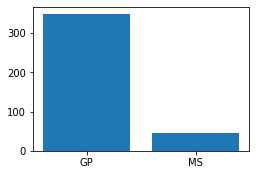

In [5]:
col_name = "school"
analyse_col(col_name)

## Sex  — пол ученика ('F' - женский, 'M' - мужской)

number of unique values = 2


,sex
F,208
M,187


number of all values = 395
number of meaningful values =  395
number of missing values =  0


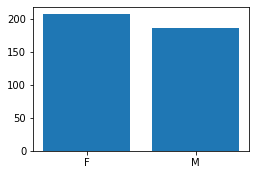

In [6]:
col_name = "sex"
analyse_col(col_name)

## age — возраст ученика (от 15 до 22)

number of unique values = 8


,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


number of all values = 395
number of meaningful values =  395
number of missing values =  0


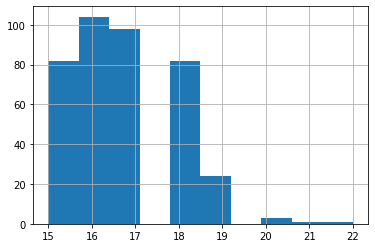

In [7]:
col_name = "age"
analyse_col(col_name)

## address — тип адреса ученика ('U' - городской, 'R' - за городом)

number of unique values = 2


,address
U,295
R,83


number of all values = 395
number of meaningful values =  378
number of missing values =  17


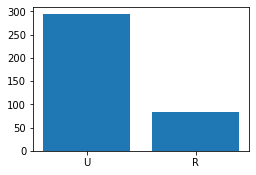

In [8]:
col_name = "address"
analyse_col(col_name)

In [9]:
set_missing2nan(col_name)

missing values in address


6      NaN
52     NaN
75     NaN
92     NaN
96     NaN
159    NaN
168    NaN
241    NaN
254    NaN
270    NaN
292    NaN
348    NaN
350    NaN
354    NaN
359    NaN
372    NaN
376    NaN
Name: address, dtype: object

all missing values are set to np.nan


## famsize — размер семьи('LE3' <= 3, 'GT3' >3)

number of unique values = 2


,famsize
GT3,261
LE3,107


number of all values = 395
number of meaningful values =  368
number of missing values =  27


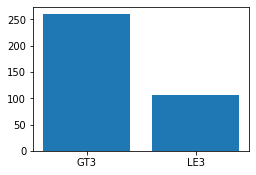

In [10]:
col_name = "famsize"
analyse_col(col_name)

In [11]:
set_missing2nan(col_name)

missing values in famsize


0      NaN
9      NaN
32     NaN
36     NaN
76     NaN
78     NaN
79     NaN
114    NaN
128    NaN
129    NaN
167    NaN
172    NaN
195    NaN
202    NaN
221    NaN
228    NaN
235    NaN
237    NaN
252    NaN
253    NaN
254    NaN
268    NaN
280    NaN
313    NaN
344    NaN
360    NaN
367    NaN
Name: famsize, dtype: object

all missing values are set to np.nan


## Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

number of unique values = 2


,Pstatus
T,314
A,36


number of all values = 395
number of meaningful values =  350
number of missing values =  45


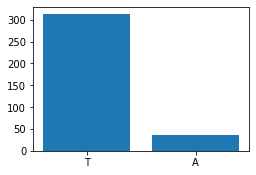

In [12]:
col_name = "Pstatus"
analyse_col(col_name) 

In [13]:
set_missing2nan(col_name)

missing values in Pstatus


1      NaN
9      NaN
11     NaN
15     NaN
25     NaN
28     NaN
54     NaN
63     NaN
67     NaN
81     NaN
96     NaN
108    NaN
112    NaN
131    NaN
139    NaN
147    NaN
149    NaN
153    NaN
158    NaN
174    NaN
182    NaN
183    NaN
186    NaN
193    NaN
197    NaN
198    NaN
210    NaN
227    NaN
234    NaN
239    NaN
245    NaN
252    NaN
260    NaN
265    NaN
266    NaN
268    NaN
271    NaN
282    NaN
298    NaN
307    NaN
313    NaN
333    NaN
342    NaN
357    NaN
364    NaN
Name: Pstatus, dtype: object

all missing values are set to np.nan


## Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

number of unique values = 5


,Medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


number of all values = 395
number of meaningful values =  392
number of missing values =  3


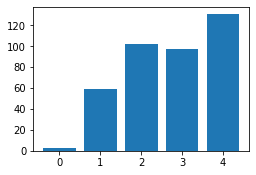

In [14]:
col_name = "Medu"
analyse_col(col_name)

In [15]:
set_missing2nan(col_name)

missing values in Medu


92    NaN
193   NaN
239   NaN
Name: Medu, dtype: float64

all missing values are set to np.nan


## Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

number of unique values = 6


,Fedu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


number of all values = 395
number of meaningful values =  371
number of missing values =  24


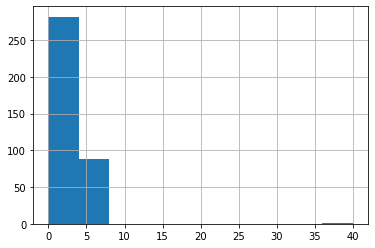

In [16]:
col_name = "Fedu"
analyse_col(col_name)

number of unique values = 5


,Fedu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2


number of all values = 395
number of meaningful values =  370
number of missing values =  25


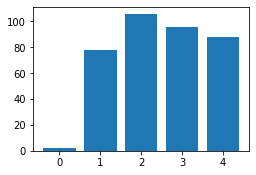

In [17]:
# удалим плохо заполненные значения (допустимые значения от 0 до 4)
stud.Fedu = stud.Fedu.apply(lambda x: x if (x <= 4) & (x >= 0) else np.nan)
analyse_col(col_name)

In [18]:
set_missing2nan(col_name)

missing values in Fedu


11    NaN
21    NaN
42    NaN
46    NaN
57    NaN
58    NaN
67    NaN
137   NaN
142   NaN
159   NaN
161   NaN
180   NaN
195   NaN
232   NaN
236   NaN
259   NaN
280   NaN
281   NaN
286   NaN
287   NaN
290   NaN
310   NaN
328   NaN
349   NaN
374   NaN
Name: Fedu, dtype: float64

all missing values are set to np.nan


## Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

number of unique values = 5


,Mjob
other,133
services,98
at_home,58
teacher,55
health,32


number of all values = 395
number of meaningful values =  376
number of missing values =  19


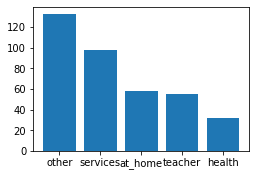

In [19]:
col_name = "Mjob"
analyse_col(col_name)

In [20]:
set_missing2nan(col_name)

missing values in Mjob


29     NaN
54     NaN
59     NaN
88     NaN
104    NaN
128    NaN
145    NaN
156    NaN
166    NaN
174    NaN
177    NaN
219    NaN
224    NaN
260    NaN
265    NaN
268    NaN
277    NaN
291    NaN
337    NaN
Name: Mjob, dtype: object

all missing values are set to np.nan


## Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

number of unique values = 5


,Fjob
other,197
services,102
teacher,29
at_home,16
health,15


number of all values = 395
number of meaningful values =  359
number of missing values =  36


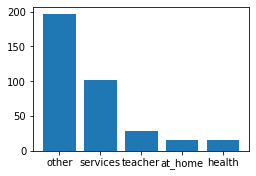

In [21]:
col_name = "Fjob"
analyse_col(col_name)

In [22]:
set_missing2nan(col_name)

missing values in Fjob


3      NaN
17     NaN
22     NaN
26     NaN
31     NaN
44     NaN
47     NaN
52     NaN
59     NaN
68     NaN
107    NaN
118    NaN
120    NaN
135    NaN
151    NaN
152    NaN
160    NaN
161    NaN
169    NaN
182    NaN
216    NaN
229    NaN
250    NaN
266    NaN
294    NaN
303    NaN
309    NaN
316    NaN
336    NaN
341    NaN
345    NaN
363    NaN
365    NaN
373    NaN
374    NaN
384    NaN
Name: Fjob, dtype: object

all missing values are set to np.nan


## reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

number of unique values = 4


,reason
course,137
home,104
reputation,103
other,34


number of all values = 395
number of meaningful values =  378
number of missing values =  17


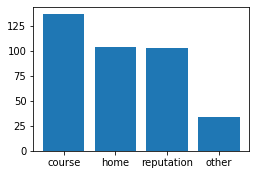

In [23]:
col_name = "reason"
analyse_col(col_name)

In [24]:
set_missing2nan(col_name)

missing values in reason


33     NaN
63     NaN
73     NaN
77     NaN
112    NaN
137    NaN
138    NaN
140    NaN
185    NaN
186    NaN
196    NaN
263    NaN
335    NaN
363    NaN
373    NaN
382    NaN
394    NaN
Name: reason, dtype: object

all missing values are set to np.nan


## guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

number of unique values = 3


,guardian
mother,250
father,86
other,28


number of all values = 395
number of meaningful values =  364
number of missing values =  31


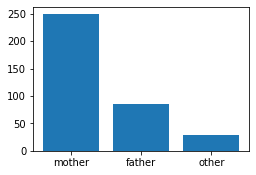

In [25]:
col_name = "guardian"
analyse_col(col_name)

In [26]:
set_missing2nan(col_name)

missing values in guardian


38     NaN
41     NaN
49     NaN
53     NaN
60     NaN
81     NaN
90     NaN
98     NaN
138    NaN
144    NaN
164    NaN
173    NaN
181    NaN
223    NaN
235    NaN
240    NaN
258    NaN
279    NaN
291    NaN
318    NaN
331    NaN
344    NaN
347    NaN
349    NaN
362    NaN
364    NaN
365    NaN
376    NaN
385    NaN
390    NaN
392    NaN
Name: guardian, dtype: object

all missing values are set to np.nan


## traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

number of unique values = 4


,traveltime
1.0,242
2.0,96
3.0,22
4.0,7


number of all values = 395
number of meaningful values =  367
number of missing values =  28


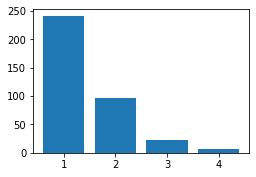

In [27]:
col_name = "traveltime"
analyse_col(col_name)

In [28]:
set_missing2nan(col_name)

missing values in traveltime


26    NaN
30    NaN
35    NaN
37    NaN
59    NaN
68    NaN
70    NaN
104   NaN
112   NaN
132   NaN
134   NaN
137   NaN
142   NaN
147   NaN
157   NaN
160   NaN
182   NaN
226   NaN
234   NaN
241   NaN
261   NaN
268   NaN
310   NaN
348   NaN
372   NaN
384   NaN
385   NaN
389   NaN
Name: traveltime, dtype: float64

all missing values are set to np.nan


## studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

number of unique values = 4


,studytime
2.0,194
1.0,103
3.0,64
4.0,27


number of all values = 395
number of meaningful values =  388
number of missing values =  7


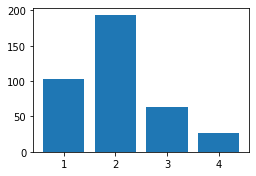

In [29]:
col_name = "studytime"
analyse_col(col_name)

In [30]:
set_missing2nan(col_name)

missing values in studytime


17    NaN
91    NaN
112   NaN
129   NaN
227   NaN
266   NaN
314   NaN
Name: studytime, dtype: float64

all missing values are set to np.nan


## failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

number of unique values = 4


,failures
0.0,293
1.0,49
2.0,16
3.0,15


number of all values = 395
number of meaningful values =  373
number of missing values =  22


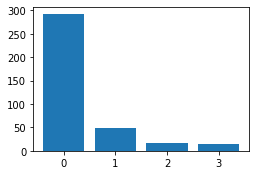

In [31]:
col_name = "failures"
analyse_col(col_name)

In [32]:
set_missing2nan(col_name)

missing values in failures


21    NaN
48    NaN
54    NaN
68    NaN
91    NaN
107   NaN
108   NaN
114   NaN
115   NaN
125   NaN
153   NaN
158   NaN
170   NaN
171   NaN
204   NaN
214   NaN
236   NaN
261   NaN
280   NaN
313   NaN
320   NaN
344   NaN
Name: failures, dtype: float64

all missing values are set to np.nan


## schoolsup — дополнительная образовательная поддержка (yes или no)

number of unique values = 2


,schoolsup
no,335
yes,51


number of all values = 395
number of meaningful values =  386
number of missing values =  9


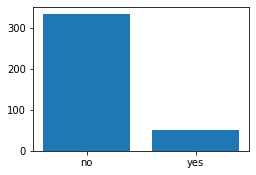

In [33]:
col_name = "schoolsup"
analyse_col(col_name)

In [34]:
set_missing2nan(col_name)

missing values in schoolsup


27     NaN
35     NaN
79     NaN
151    NaN
211    NaN
274    NaN
321    NaN
392    NaN
394    NaN
Name: schoolsup, dtype: object

all missing values are set to np.nan


## famsup — семейная образовательная поддержка (yes или no)

number of unique values = 2


,famsup
yes,219
no,137


number of all values = 395
number of meaningful values =  356
number of missing values =  39


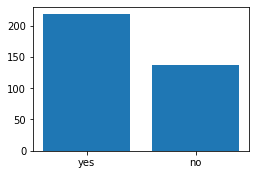

In [35]:
col_name = "famsup"
analyse_col(col_name)

In [36]:
set_missing2nan(col_name)

missing values in famsup


17     NaN
22     NaN
28     NaN
33     NaN
38     NaN
40     NaN
51     NaN
52     NaN
59     NaN
61     NaN
78     NaN
98     NaN
127    NaN
146    NaN
149    NaN
167    NaN
169    NaN
180    NaN
195    NaN
222    NaN
232    NaN
234    NaN
237    NaN
246    NaN
267    NaN
268    NaN
269    NaN
271    NaN
272    NaN
276    NaN
279    NaN
283    NaN
292    NaN
302    NaN
313    NaN
327    NaN
328    NaN
335    NaN
363    NaN
Name: famsup, dtype: object

all missing values are set to np.nan


## paid — дополнительные платные занятия по математике (yes или no)

number of unique values = 2


,paid
no,200
yes,155


number of all values = 395
number of meaningful values =  355
number of missing values =  40


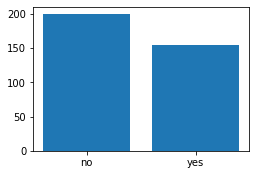

In [37]:
col_name = "paid"
analyse_col(col_name)

In [38]:
set_missing2nan(col_name)

missing values in paid


2      NaN
18     NaN
19     NaN
21     NaN
26     NaN
31     NaN
51     NaN
57     NaN
68     NaN
81     NaN
82     NaN
96     NaN
104    NaN
136    NaN
148    NaN
164    NaN
178    NaN
184    NaN
192    NaN
199    NaN
200    NaN
201    NaN
214    NaN
215    NaN
218    NaN
236    NaN
246    NaN
253    NaN
256    NaN
263    NaN
279    NaN
305    NaN
309    NaN
313    NaN
318    NaN
319    NaN
341    NaN
356    NaN
371    NaN
384    NaN
Name: paid, dtype: object

all missing values are set to np.nan


## activities — дополнительные внеучебные занятия (yes или no)

number of unique values = 2


,activities
yes,195
no,186


number of all values = 395
number of meaningful values =  381
number of missing values =  14


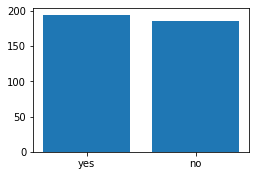

In [39]:
col_name = "activities"
analyse_col(col_name)

In [40]:
set_missing2nan(col_name)

missing values in activities


43     NaN
44     NaN
54     NaN
81     NaN
99     NaN
116    NaN
126    NaN
140    NaN
141    NaN
160    NaN
163    NaN
207    NaN
212    NaN
393    NaN
Name: activities, dtype: object

all missing values are set to np.nan


## nursery — посещал детский сад (yes или no)

number of unique values = 2


,nursery
yes,300
no,79


number of all values = 395
number of meaningful values =  379
number of missing values =  16


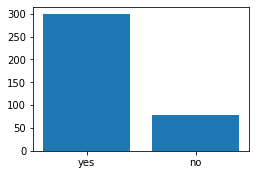

In [41]:
col_name = "nursery"
analyse_col(col_name)

In [42]:
set_missing2nan(col_name)

missing values in nursery


22     NaN
32     NaN
85     NaN
88     NaN
152    NaN
212    NaN
249    NaN
300    NaN
332    NaN
336    NaN
340    NaN
341    NaN
350    NaN
359    NaN
365    NaN
383    NaN
Name: nursery, dtype: object

all missing values are set to np.nan


## higher — хочет получить высшее образование (yes или no)

number of unique values = 2


,higher
yes,356
no,19


number of all values = 395
number of meaningful values =  375
number of missing values =  20


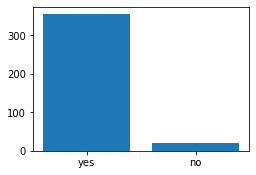

In [43]:
col_name = "higher"
analyse_col(col_name)

In [44]:
set_missing2nan(col_name)

missing values in higher


34     NaN
48     NaN
76     NaN
84     NaN
96     NaN
142    NaN
149    NaN
158    NaN
170    NaN
171    NaN
181    NaN
227    NaN
250    NaN
281    NaN
320    NaN
331    NaN
347    NaN
362    NaN
382    NaN
392    NaN
Name: higher, dtype: object

all missing values are set to np.nan


## internet — наличие интернета дома (yes или no)

number of unique values = 2


,internet
yes,305
no,56


number of all values = 395
number of meaningful values =  361
number of missing values =  34


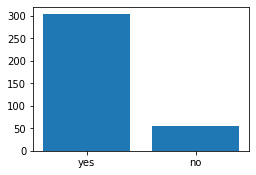

In [45]:
col_name = "internet"
analyse_col(col_name)

In [46]:
set_missing2nan(col_name)

missing values in internet


0      NaN
12     NaN
52     NaN
65     NaN
80     NaN
86     NaN
98     NaN
110    NaN
115    NaN
117    NaN
118    NaN
125    NaN
132    NaN
133    NaN
141    NaN
155    NaN
162    NaN
185    NaN
191    NaN
194    NaN
198    NaN
215    NaN
239    NaN
251    NaN
257    NaN
258    NaN
259    NaN
273    NaN
308    NaN
333    NaN
340    NaN
384    NaN
385    NaN
389    NaN
Name: internet, dtype: object

all missing values are set to np.nan


## romantic — в романтических отношениях (yes или no)

number of unique values = 2


,romantic
no,240
yes,124


number of all values = 395
number of meaningful values =  364
number of missing values =  31


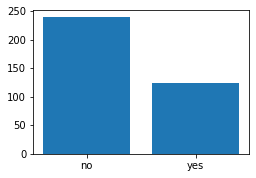

In [47]:
col_name = "romantic"
analyse_col(col_name)

In [48]:
set_missing2nan(col_name)

missing values in romantic


2      NaN
13     NaN
26     NaN
27     NaN
41     NaN
51     NaN
54     NaN
67     NaN
75     NaN
112    NaN
139    NaN
147    NaN
155    NaN
162    NaN
181    NaN
190    NaN
194    NaN
204    NaN
239    NaN
261    NaN
266    NaN
280    NaN
290    NaN
293    NaN
308    NaN
330    NaN
339    NaN
342    NaN
372    NaN
373    NaN
380    NaN
Name: romantic, dtype: object

all missing values are set to np.nan


## famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

number of unique values = 6


,famrel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,7
-1.0,1


number of all values = 395
number of meaningful values =  368
number of missing values =  27


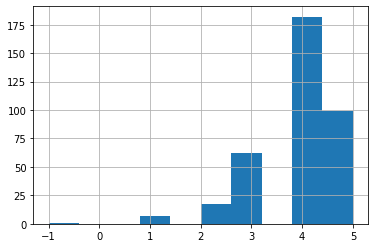

In [49]:
col_name = "famrel"
analyse_col(col_name)

number of unique values = 5


,famrel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,7


number of all values = 395
number of meaningful values =  367
number of missing values =  28


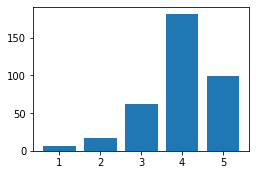

In [50]:
#remove badly filled values
stud.famrel = stud.famrel.apply(lambda x: x if (x <= 5) & (x >= 1) else np.nan)
analyse_col(col_name)

In [51]:
set_missing2nan(col_name)

missing values in famrel


8     NaN
12    NaN
20    NaN
25    NaN
43    NaN
72    NaN
73    NaN
75    NaN
94    NaN
102   NaN
118   NaN
136   NaN
160   NaN
195   NaN
217   NaN
229   NaN
276   NaN
290   NaN
309   NaN
317   NaN
323   NaN
337   NaN
347   NaN
348   NaN
349   NaN
355   NaN
360   NaN
373   NaN
Name: famrel, dtype: float64

all missing values are set to np.nan


## freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

number of unique values = 5


,freetime
3.0,153
4.0,112
2.0,63
5.0,38
1.0,18


number of all values = 395
number of meaningful values =  384
number of missing values =  11


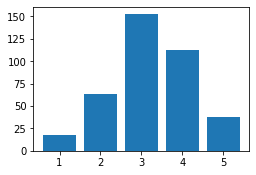

In [52]:
col_name = "freetime"
analyse_col(col_name)

In [53]:
set_missing2nan(col_name)

missing values in freetime


32    NaN
74    NaN
131   NaN
201   NaN
280   NaN
283   NaN
290   NaN
291   NaN
311   NaN
314   NaN
338   NaN
Name: freetime, dtype: float64

all missing values are set to np.nan


## goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

number of unique values = 5


,goout
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23


number of all values = 395
number of meaningful values =  387
number of missing values =  8


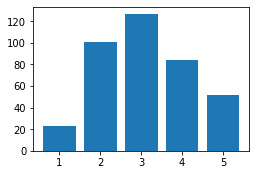

In [54]:
col_name = "goout"
analyse_col(col_name)

In [55]:
set_missing2nan(col_name)

missing values in goout


89    NaN
92    NaN
200   NaN
202   NaN
221   NaN
241   NaN
312   NaN
322   NaN
Name: goout, dtype: float64

all missing values are set to np.nan


## health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

number of unique values = 5


,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43


number of all values = 395
number of meaningful values =  380
number of missing values =  15


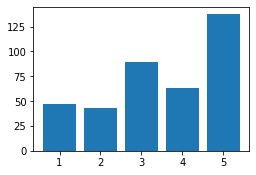

In [56]:
col_name = "health"
analyse_col(col_name)

In [57]:
set_missing2nan(col_name)

missing values in health


30    NaN
55    NaN
88    NaN
145   NaN
153   NaN
164   NaN
189   NaN
208   NaN
220   NaN
236   NaN
256   NaN
259   NaN
266   NaN
330   NaN
342   NaN
Name: health, dtype: float64

all missing values are set to np.nan


## absences — количество пропущенных занятий

number of unique values = 36


,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
3.0,8
16.0,7


number of all values = 395
number of meaningful values =  383
number of missing values =  12


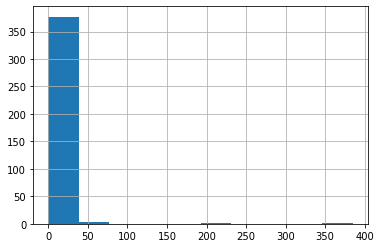

In [58]:
col_name = "absences"
analyse_col(col_name)

In [59]:
set_missing2nan(col_name)

missing values in absences


24    NaN
101   NaN
120   NaN
129   NaN
150   NaN
172   NaN
215   NaN
227   NaN
254   NaN
265   NaN
270   NaN
352   NaN
Name: absences, dtype: float64

all missing values are set to np.nan


#### Проверим на наличие выбросов, выглядят подозрительными 100 и более пропусков.

 Q1: 0.0,
 Q3: 8.0,
 IQR: 8.0,
 Range: [-12.0, 20.0].
 number of values is 383
 number of values in the Range is 366
 17 values were set to np.nan


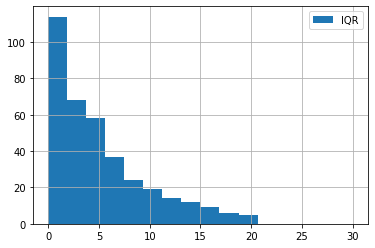

In [60]:
median = stud.absences.median()
IQR = stud.absences.quantile(0.75) - stud.absences.quantile(0.25)
perc25 = stud.absences.quantile(0.25)
perc75 = stud.absences.quantile(0.75)
print(' Q1: {},\n'.format(perc25),\
      'Q3: {},\n'.format(perc75),\
      "IQR: {},\n".format(IQR),\
      "Range: [{f}, {l}].\n".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR),\
      "number of values is {}\n".format(len(stud.absences)-np.isnan(stud.absences).sum()),\
      "number of values in the Range is {}\n".format(sum(stud.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR))),\
      "{} values were set to np.nan".format((len(stud.absences)-np.isnan(stud.absences).sum())
                                            -sum(stud.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR))))

stud.absences.loc[stud.absences.between(perc25 - 1.5 * IQR,
                                        perc75 + 1.5 * IQR)].hist(bins=16,
                                                                  range=(0,
                                                                         30),
                                                                  label='IQR')
plt.legend()

#выбросы есть. Заменим эти значения на np.nan
stud.absences = stud.absences.apply(lambda x: np.nan if (
    x < perc25 - 1.5 * IQR) | (x > perc75 + 1.5 * IQR) else x)

## score — баллы по госэкзамену по математике

number of unique values = 18


,score
50.0,54
55.0,46
0.0,37
75.0,33
65.0,31
40.0,31
60.0,31
70.0,27
45.0,27
80.0,16


number of all values = 395
number of meaningful values =  389
number of missing values =  6


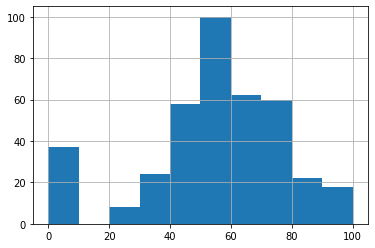

In [61]:
col_name = "score"
analyse_col(col_name)

In [62]:
set_missing2nan(col_name)

missing values in score


201   NaN
244   NaN
270   NaN
283   NaN
312   NaN
350   NaN
Name: score, dtype: float64

all missing values are set to np.nan


In [63]:
# удалим из базы данных строки и отсутствующими оценками, так как такие строки нам бессмыслены
stud = stud.loc[-np.isnan(stud.score)]

 Q1: 40.0,
 Q3: 70.0,
 IQR: 30.0,
 Range: [-5.0, 115.0].
 number of values is 389
 number of values in the Range is 389
 0 values were set to np.nan


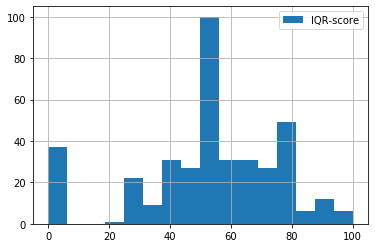

In [64]:
# проверим, есть ли выпадающие значения

median = stud.score.median()
IQR = stud.score.quantile(0.75) - stud.score.quantile(0.25)
perc25 = stud.score.quantile(0.25)
perc75 = stud.score.quantile(0.75)
print(' Q1: {},\n'.format(perc25),\
      'Q3: {},\n'.format(perc75),\
      "IQR: {},\n".format(IQR),\
      "Range: [{f}, {l}].\n".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR),\
      "number of values is {}\n".format(len(stud.score)-np.isnan(stud.score).sum()),\
      "number of values in the Range is {}\n".format(sum(stud.score.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR))),\
      "{} values were set to np.nan".format((len(stud.score)-np.isnan(stud.score).sum())
                                            -sum(stud.score.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR))))

stud.score.loc[stud.score.between(perc25 - 1.5 * IQR,
                                  perc75 + 1.5 * IQR)].hist(bins=16,
                                                            range=(0, 100),
                                                            label='IQR-score')
plt.legend()

# таких значний не оказалось

In [65]:
#приведем все переменные к одинаковым типам. у нас есть переменные только типа object и int64
stud_checked = stud.convert_dtypes(infer_objects=False,
                                   convert_string=False,
                                   convert_integer=True,
                                   convert_boolean=True)
stud_checked.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      389 non-null    object
 1   sex         389 non-null    object
 2   age         389 non-null    Int64 
 3   address     374 non-null    object
 4   famsize     362 non-null    object
 5   Pstatus     344 non-null    object
 6   Medu        386 non-null    Int64 
 7   Fedu        364 non-null    Int64 
 8   Mjob        370 non-null    object
 9   Fjob        353 non-null    object
 10  reason      372 non-null    object
 11  guardian    358 non-null    object
 12  traveltime  361 non-null    Int64 
 13  studytime   382 non-null    Int64 
 14  failures    367 non-null    Int64 
 15  schoolsup   380 non-null    object
 16  famsup      351 non-null    object
 17  paid        350 non-null    object
 18  activities  375 non-null    object
 19  nursery     374 non-null    object
 20  higher    

## Результат первичного осмотра

Данные вцелом заполнены, не более 40 пропусков в колонках. 

Все пустые данные в колонках заменены на NaN. 

Строки с пустыми значениями в score удаленены. 

В колонках Fedu и famrel было обнаружено по 1 неправильно заполненному значению. Это значения были исправлено на NaN.

Самые необычные данные это распределение оценок и посещаемость. 
В случае с оценками много (37, ~10%) получило оценку 0 и есть 6 пропущенных значений. Строки с этими 6 пропущеннымы значениями удалены.

Много детей, которые регулярно не посещают занятия. Значения вне пределов допустимого интервала [Q1-IQR*1.5, Q3+IQR*1.5] установлены на np.nan, таких значений 17. 

studytime, granular" колонка не имеет точного описания и поэтому удалена


Далее рассмотрим данные подробнее. 

# Построение модели

## определим нужно ли оставлять учеников с оценкой 0

In [66]:
#вспомогательные функции для построения гипотез


#тест стьюдента для пары датафреймов с одинаковой колонкой
#выводит средние и рvalue для распр стьюдента
#head =1 вывести заголовок, 0 не выводить заголовок
def compare2dfcols(df1,
                   df2,
                   col_name,
                   head=0,
                   alternative='two-sided',
                   round_vals=4):
    x1 = df1[col_name].to_numpy()
    x2 = df2[col_name].to_numpy()
    x1 = x1[~np.isnan(x1)]
    x2 = x2[~np.isnan(x2)]
    t = sm.stats.CompareMeans.from_data(x1,x2).ttest_ind(usevar='unequal',\
                                                alternative='two-sided',\
                                                value=0) #t-val, p, df
    if (head == 1):
        print("t-test:mean1|mean2|p-value\n")

    print(col_name,
          round(np.mean(x1), round_vals),
          round(np.mean(x2), round_vals),
          round(t[1], round_vals),
          "\n",
          sep="|")
    return


#тест стьюдента для пары колонок с1 и с2
#выводит средние и рvalue для распр стьюдента
#head =1 вывести заголовок, 0 не выводить заголовок
def compare2cols(c1, c2, head=0, alternative='two-sided', round_vals=4):
    x1 = c1.to_numpy()
    x2 = c2.to_numpy()
    x1 = x1[~np.isnan(x1)]
    x2 = x2[~np.isnan(x2)]
    t = sm.stats.CompareMeans.from_data(x1,x2).ttest_ind(usevar='unequal',\
                                                alternative='two-sided',\
                                                value=0) #t-val, p, df
    if (head == 1):
        print("t-test:mean1|mean2|p-value\n")

    print(col_name,
          round(np.mean(x1), round_vals),
          round(np.mean(x2), round_vals),
          round(t[1], round_vals),
          "\n",
          sep="|")
    return

In [67]:
#создадим две базы данных
#в одной будут ученики получившие оценку 0,
#а в другой все остальные и сравним их средние значения
stud_checked = stud
stud_0score = {}
stud_0score = stud_checked[stud_checked.score == 0].copy(
)  #не будем изменять оригинальную базу данных

stud_no0score = {}
stud_no0score = stud_checked[stud_checked.score != 0].copy(
)  #не будем изменять оригинальную базу данных

#проведем тест стьюдента для численных переменных
compare2dfcols(stud_no0score, stud_0score, "age", head=1)
compare2dfcols(stud_no0score, stud_0score, "Medu")
compare2dfcols(stud_no0score, stud_0score, "Fedu")
compare2dfcols(stud_no0score, stud_0score, "traveltime")
compare2dfcols(stud_no0score, stud_0score, "studytime")
compare2dfcols(stud_no0score, stud_0score, "failures")
compare2dfcols(stud_no0score, stud_0score, "famrel")
compare2dfcols(stud_no0score, stud_0score, "freetime")
compare2dfcols(stud_no0score, stud_0score, "goout")
compare2dfcols(stud_no0score, stud_0score, "health")
compare2dfcols(stud_no0score, stud_0score, "absences")
compare2dfcols(stud_no0score, stud_0score, "score")

t-test:mean1|mean2|p-value

age|16.6335|17.0541|0.0692|

Medu|2.8114|2.3333|0.0124|

Fedu|2.5455|2.3235|0.2869|

traveltime|1.4286|1.5|0.5933|

studytime|2.0464|1.9459|0.5245|

failures|0.2711|0.8571|0.0022|

famrel|3.9572|3.8235|0.4698|

freetime|3.2355|3.1111|0.4339|

goout|3.0867|3.1667|0.7312|

health|3.5162|3.6571|0.5494|

absences|5.12|0.0|0.0|

score|57.7557|0.0|0.0|



### Вывод 2. 

Комментарий: студенты очень похожи в двух группах (с оценкой 0 и остальные), единственными существенным отличием является снижение образования матери (ниже на 20% в группе с оценкой 0) и в 3 раза чаще внеучебные неудачи. В любом случае эта группа студентов "особенная" и причины их "неудач" не могут быть выяснены методами статистики, поэтому далее мы таких студентв не рассматриваем.


## Анализ номинативных переменных по отношению к оценке

In [68]:
# вспомогательные функции для анализа номинативных переменных

# вспомогательная функция для рисования боксплото
# yscore = "score"
# xcolumn = name of column for test
# df - dataframe
def get_boxplot(xcolumn, yscore, df, pval=0.05):
    fig, ax = plt.subplots(figsize=(3.3, 3.3))
    sns.boxplot(x=xcolumn,
                y=yscore,
                data=df.loc[df.loc[:, xcolumn].isin(
                    df.loc[:, xcolumn].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + xcolumn)
    plt.show()


# вспомогательная функция для массового теста стьюдента
# yscore = "score"
# xcolumn = name of column for test
# df - dataframe
def get_stat_dif(xcolumn, yscore, df, pval=0.05):
    cols = df.loc[:, xcolumn].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))

    pval = pval / len(combinations_all)  # Учли поправку Бонферони
    for comb in combinations_all:
        pval_comb = ttest_ind(
            df.loc[df.loc[:, xcolumn] == comb[0], yscore],
            df.loc[df.loc[:, xcolumn] == comb[1], yscore]).pvalue
        if pval_comb <= pval:  # уже учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки',
                  xcolumn)
            print("Поправка бонферони 1/{}".format(len(combinations_all)))
            print('значения: {}|{}'.format(comb[0], comb[1]))
            print('pvalue: {}\n'.format(pval_comb))


# вспомогательная функция для рисования гистограмм
# yscore = "score"
# xcolumn = name of column for test
# df - dataframe
def get_hist(col_name, df):

    tempDF = pd.DataFrame(df[col_name].value_counts())

    #stud[col_name].hist()
    if (len(tempDF[col_name]) < 6):
        fig = plt.figure()
        axes = fig.add_axes([0, 0, 0.5, 0.5])
        axes.bar(x=tempDF.index, height=tempDF[col_name])
        axes.set_title('Hist for ' + col_name)
    else:
        stud[col_name].hist()
        axes.set_title('Hist for ' + col_name)
    return

In [69]:
# все столбцы с текствыми переменными
colnames_objects = [
    "school", "sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", "reason",
    "guardian", "schoolsup", "famsup", "paid", "activities", "nursery",
    "higher", "internet", "romantic"
]

stud_no0score[colnames_objects].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      352 non-null    object
 1   sex         352 non-null    object
 2   address     338 non-null    object
 3   famsize     328 non-null    object
 4   Pstatus     311 non-null    object
 5   Mjob        335 non-null    object
 6   Fjob        320 non-null    object
 7   reason      337 non-null    object
 8   guardian    323 non-null    object
 9   schoolsup   343 non-null    object
 10  famsup      316 non-null    object
 11  paid        316 non-null    object
 12  activities  340 non-null    object
 13  nursery     340 non-null    object
 14  higher      333 non-null    object
 15  internet    323 non-null    object
 16  romantic    323 non-null    object
dtypes: object(17)
memory usage: 49.5+ KB


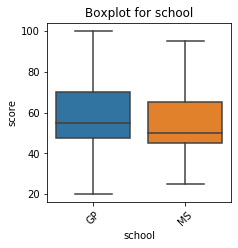

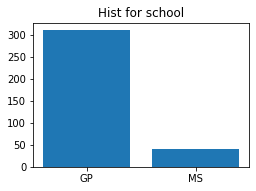

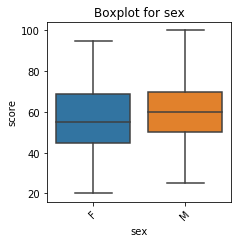

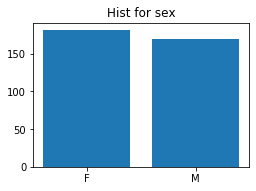

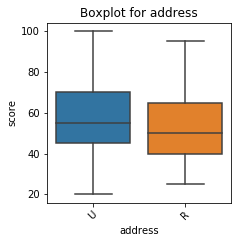

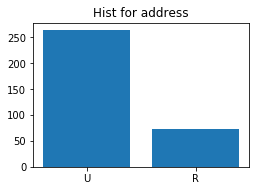

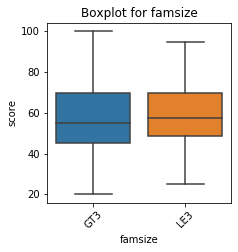

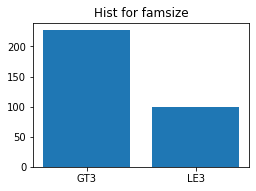

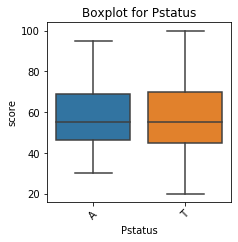

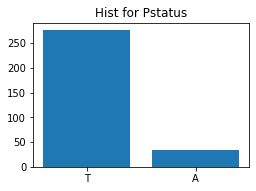

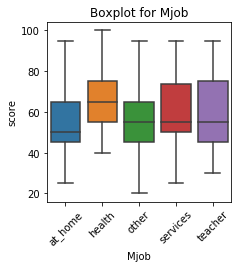

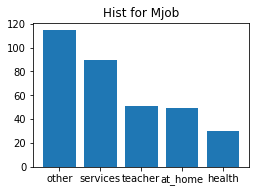

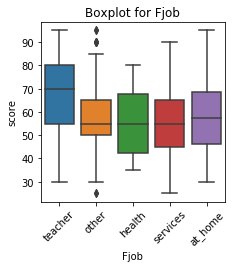

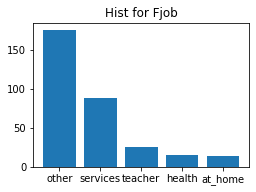

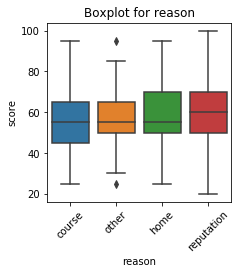

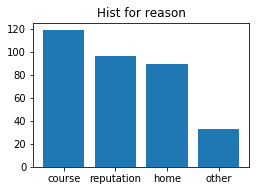

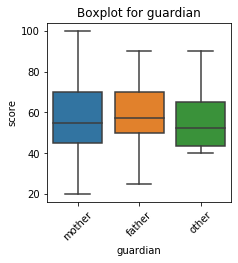

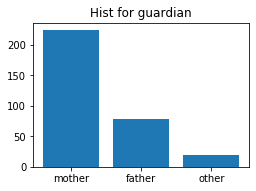

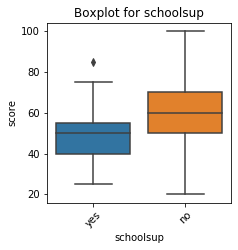

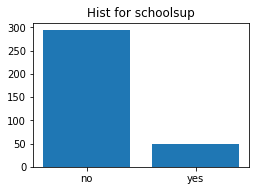

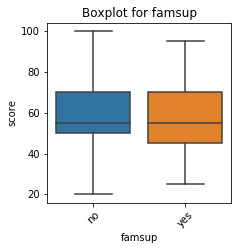

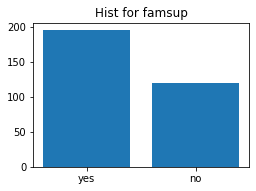

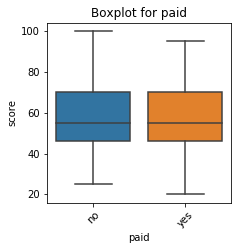

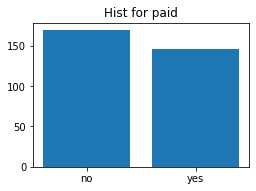

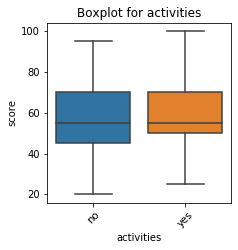

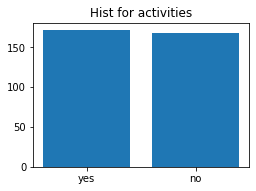

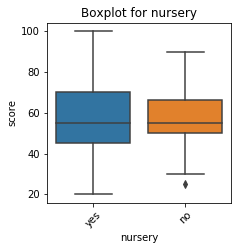

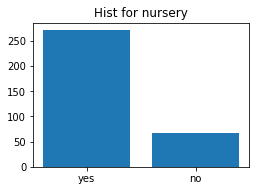

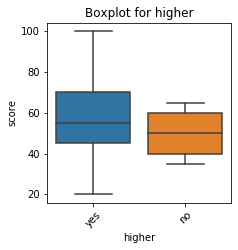

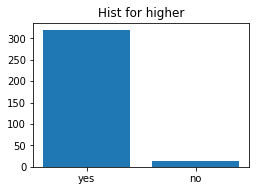

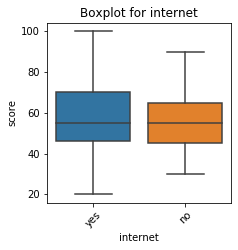

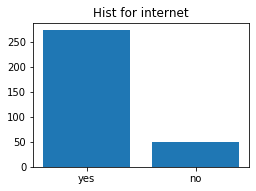

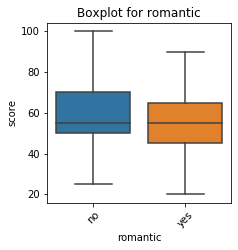

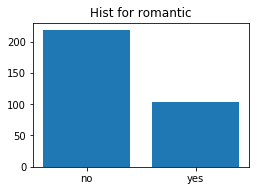

In [70]:
#смотрим на бокс плоты и гистограммы всех номинативных переменных
for col in colnames_objects:
    get_boxplot(col, "score", stud_no0score)
    get_hist(col, stud_no0score)

In [71]:
#ищем статистически значимые факторы
for col in colnames_objects:
    get_stat_dif(col, "score", stud_no0score, pval=0.07)

# результат такого теста показывает, что следующие переменные статистически важны для анализа
#pval, col_name
#1% schoolsup
#2% + Mjob, address
#3% + Fjob
#6% + sex, higher

Найдены статистически значимые различия для колонки sex
Поправка бонферони 1/1
значения: F|M
pvalue: 0.05481629433224236

Найдены статистически значимые различия для колонки address
Поправка бонферони 1/1
значения: U|R
pvalue: 0.010954630500627841

Найдены статистически значимые различия для колонки Mjob
Поправка бонферони 1/10
значения: other|health
pvalue: 0.0017949217915780725

Найдены статистически значимые различия для колонки Mjob
Поправка бонферони 1/10
значения: at_home|health
pvalue: 0.0027982059798529013

Найдены статистически значимые различия для колонки Fjob
Поправка бонферони 1/10
значения: other|teacher
pvalue: 0.002778578861364664

Найдены статистически значимые различия для колонки Fjob
Поправка бонферони 1/10
значения: services|teacher
pvalue: 0.002516318803149705

Найдены статистически значимые различия для колонки schoolsup
Поправка бонферони 1/1
значения: no|yes
pvalue: 2.8152819921387307e-06

Найдены статистически значимые различия для колонки higher
Поправка бонф

In [72]:
col = "schoolsup"
print(col)
compare2cols(stud_no0score[stud_no0score[col] == "yes"].score,
             stud_no0score[stud_no0score[col] == "no"].score,
             head=1,
             alternative="two-sided",
             round_vals=8)
col = "address"
print(col)
compare2cols(stud_no0score[stud_no0score[col] == "U"].score,
             stud_no0score[stud_no0score[col] == "R"].score,
             head=0,
             alternative="two-sided",
             round_vals=3)
col = "sex"
print(col)
compare2cols(stud_no0score[stud_no0score[col] == "M"].score,
             stud_no0score[stud_no0score[col] == "F"].score,
             head=0,
             alternative="two-sided")
col = "higher"
print(col)
compare2cols(stud_no0score[stud_no0score[col] == "yes"].score,
             stud_no0score[stud_no0score[col] == "no"].score,
             head=0,
             alternative="two-sided")
################################################################
col = "Mjob"
print(col, "other", "health")
compare2cols(stud_no0score[stud_no0score[col] == "other"].score,
             stud_no0score[stud_no0score[col] == "health"].score,
             head=0,
             alternative="two-sided")

col = "Mjob"
print(col, "at_home", "health")
compare2cols(stud_no0score[stud_no0score[col] == "at_home"].score,
             stud_no0score[stud_no0score[col] == "health"].score,
             head=0,
             alternative="two-sided")

col = "Mjob"
print(col, "teacher", "health")
compare2cols(stud_no0score[stud_no0score[col] == "teacher"].score,
             stud_no0score[stud_no0score[col] == "health"].score,
             head=0,
             alternative="two-sided")

col = "Mjob"
print(col, "services", "health")
compare2cols(stud_no0score[stud_no0score[col] == "services"].score,
             stud_no0score[stud_no0score[col] == "health"].score,
             head=0,
             alternative="two-sided")
####################################################################
col = "Fjob"
print(col, "other", "teacher")
compare2cols(stud_no0score[stud_no0score[col] == "other"].score,
             stud_no0score[stud_no0score[col] == "teacher"].score,
             head=0,
             alternative="two-sided")

col = "Fjob"
print(col, "at_home", "teacher")
compare2cols(stud_no0score[stud_no0score[col] == "at_home"].score,
             stud_no0score[stud_no0score[col] == "teacher"].score,
             head=0,
             alternative="two-sided")

col = "Fjob"
print(col, "health", "teacher")
compare2cols(stud_no0score[stud_no0score[col] == "health"].score,
             stud_no0score[stud_no0score[col] == "teacher"].score,
             head=0,
             alternative="two-sided")

col = "Fjob"
print(col, "services", "teacher")
compare2cols(stud_no0score[stud_no0score[col] == "services"].score,
             stud_no0score[stud_no0score[col] == "teacher"].score,
             head=0,
             alternative="two-sided")

schoolsup
t-test:mean1|mean2|p-value

score|48.02083333|59.61016949|5e-07|

address
score|58.83|53.356|0.012|

sex
score|59.4706|56.1538|0.055|

higher
score|58.0781|49.2308|0.0065|

Mjob other health
score|54.6957|64.6667|0.0024|

Mjob at_home health
score|54.0816|64.6667|0.0033|

Mjob teacher health
score|59.5098|64.6667|0.1592|

Mjob services health
score|59.6111|64.6667|0.1291|

Fjob other teacher
score|56.6761|66.7308|0.0154|

Fjob at_home teacher
score|59.2857|66.7308|0.2207|

Fjob health teacher
score|55.6667|66.7308|0.0473|

Fjob services teacher
score|56.1236|66.7308|0.0128|



## Вывод 3. 

Анализ номинативный переменых говорит о том, что 
1. Образовательные учреждения выявляют учеников, которые нуждаются в дополнительной поддержке, но они все равно получают статистически более низкие оценки (p=5e-7)
2. Дети в городах получают статистически более высокие оценки (p=0.012).
3. Работа матери health повышают шансы получить более высокую на 10% оценку по сравнению с матерью at_home или other. Это также самое высокое значение в среднем по отношению к другим профессиям, но это статистически недостоверно.
4. Работа отца teacher повышают шансы получить более высокую на 10% оценку по сравнению с работой service или other. Это также самое высокое значение в среднем по отношению к другим профессиям, но это статистически недостоверно.
5. Мальчиков получают на 3.3% выше оценки (p=0.055)
6. Желание учеников получить высшее образование приводит к более высоким оценкам (на 9 % с p=0.0065). 

In [73]:
# важные номинативные переменные
parameters_nom = ["schoolsup", "Mjob", "address", "Fjob", "sex", "higher"]
parameters_nom

['schoolsup', 'Mjob', 'address', 'Fjob', 'sex', 'higher']

## Анализ корреляции численных переменных по отношению к оценке

In [74]:
# список всех численных переменных
colnames_numbers = [
    "age", "Medu", "Fedu", "traveltime", "studytime", "failures", "famrel",
    "freetime", "goout", "health", "absences", "score"
]
stud_no0score[colnames_numbers].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         352 non-null    int64  
 1   Medu        350 non-null    float64
 2   Fedu        330 non-null    float64
 3   traveltime  329 non-null    float64
 4   studytime   345 non-null    float64
 5   failures    332 non-null    float64
 6   famrel      327 non-null    float64
 7   freetime    344 non-null    float64
 8   goout       346 non-null    float64
 9   health      339 non-null    float64
 10  absences    325 non-null    float64
 11  score       352 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 35.8 KB


,score,age
score,1.000000,-0.131542
age,-0.131542,1.000000


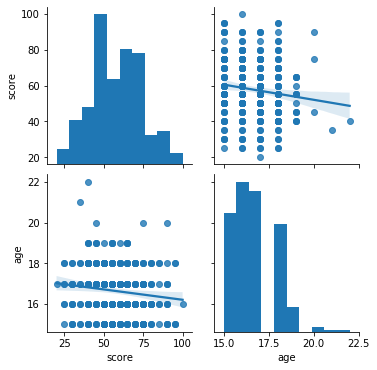

In [75]:
# age - корреляция оценок и возраста (все возраста)
sns.pairplot(stud_no0score[["score", "age"]], kind='reg')
stud_no0score[["score", "age"]].corr()

,score,age
score,1.000000,-0.131542
age,-0.131542,1.000000


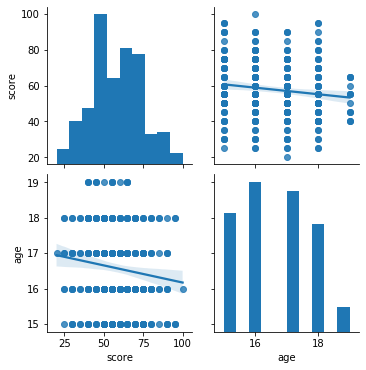

In [76]:
# age - корреляция оценок и возраста (без 5 возрастных студентов)
sns.pairplot(stud_no0score[stud_no0score.age < 20][["score", "age"]],
             kind='reg')
stud_no0score[["score", "age"]].corr()
# есть заметная антикорреляция возраста и оценок

,score,Medu,Fedu,MFedu_avg,MFedu_max,MFedu_min
score,1.000000,0.186477,0.135042,0.183576,0.221579,0.125313
Medu,0.186477,1.000000,0.611390,0.899096,0.887140,0.798948
Fedu,0.135042,0.611390,1.000000,0.896104,0.784237,0.889745
MFedu_avg,0.183576,0.899096,0.896104,1.000000,0.931411,0.940311
MFedu_max,0.221579,0.887140,0.784237,0.931411,1.000000,0.751952
MFedu_min,0.125313,0.798948,0.889745,0.940311,0.751952,1.000000


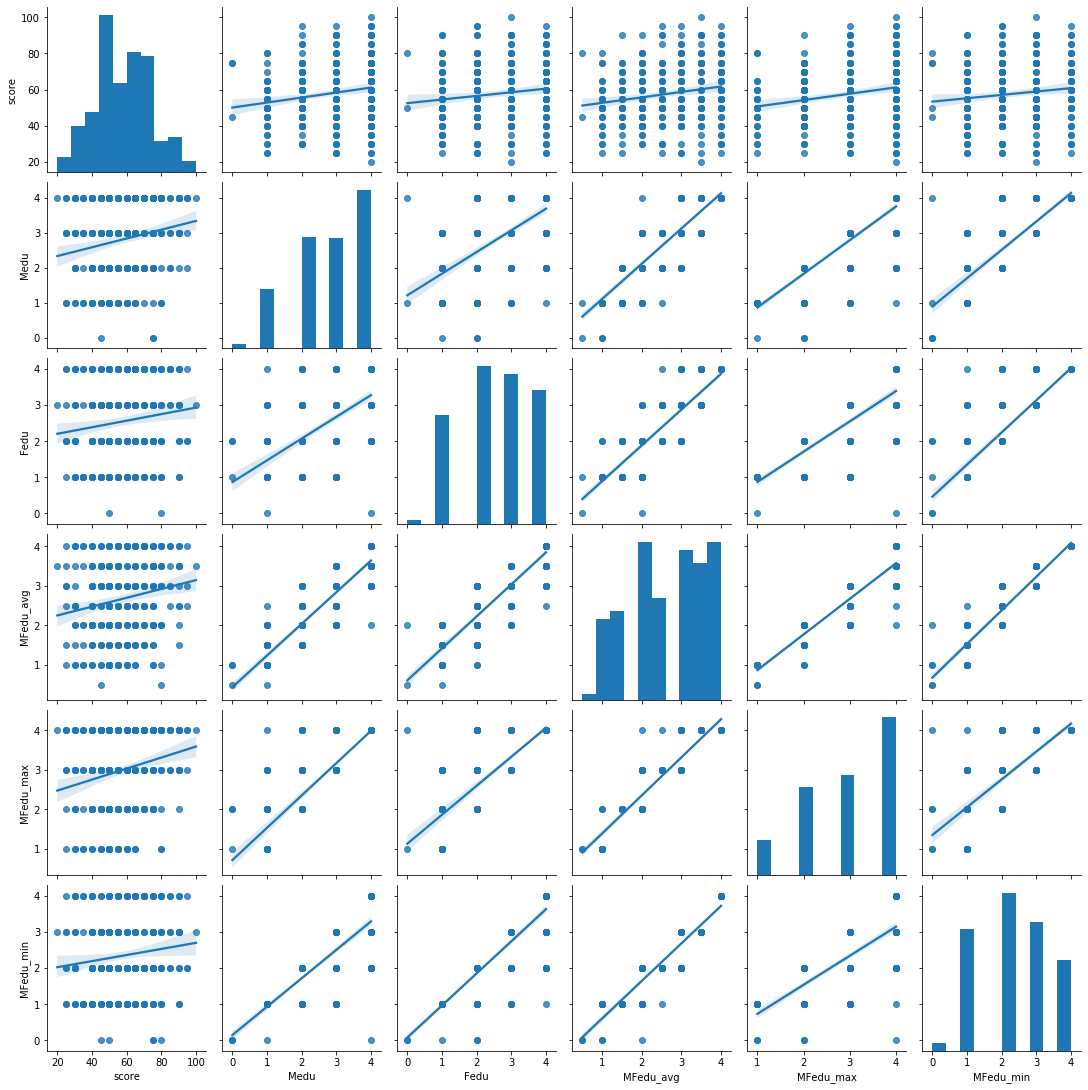

In [77]:
# корреляция образования родителей и оценок,
# посмотрим как влияет также среднее, максимальное и минимальное образование обоих родителей.
stud_no0score["MFedu_avg"] = (stud_no0score.Medu + stud_no0score.Fedu) / 2
stud_no0score["MFedu_max"] = [
    np.max([x, y])
    for x, y in zip(stud_no0score["Medu"], stud_no0score["Fedu"])
]
stud_no0score["MFedu_min"] = [
    np.min([x, y])
    for x, y in zip(stud_no0score["Medu"], stud_no0score["Fedu"])
]
sns.pairplot(stud_no0score[[
    "score", "Medu", "Fedu", "MFedu_avg", "MFedu_max", "MFedu_min"
]],
             kind='reg')
stud_no0score[["score", "Medu", "Fedu", "MFedu_avg", "MFedu_max",
               "MFedu_min"]].corr()
# самая высокая корреляция у параметра максимального образования (MFedu_max) среди родителей, его и оставим.

,score,traveltime
score,1.000000,-0.075516
traveltime,-0.075516,1.000000


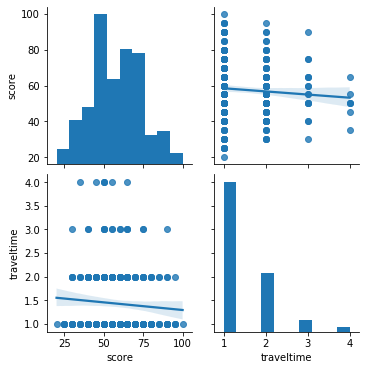

In [78]:
# корреляция оценки и времени в пути
sns.pairplot(stud_no0score[["score", "traveltime"]], kind='reg')
stud_no0score[["score", "traveltime"]].corr()

,score,studytime
score,1.000000,0.142055
studytime,0.142055,1.000000


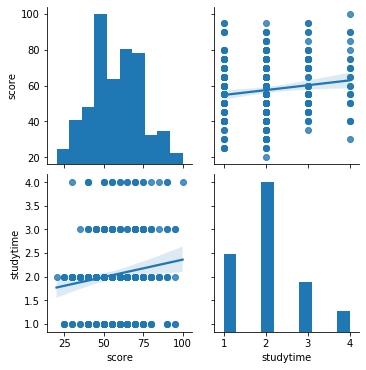

In [79]:
# корреляция оценки и времени на обоучение
sns.pairplot(stud_no0score[["score", "studytime"]], kind='reg')
stud_no0score[["score", "studytime"]].corr()

,score,failures
score,1.000000,-0.289377
failures,-0.289377,1.000000


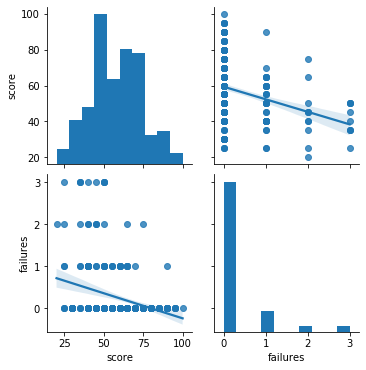

In [80]:
# корреляция оценки и колличество неудач
sns.pairplot(stud_no0score[["score", "failures"]], kind='reg')
stud_no0score[["score", "failures"]].corr()

,score,famrel
score,1.000000,0.030041
famrel,0.030041,1.000000


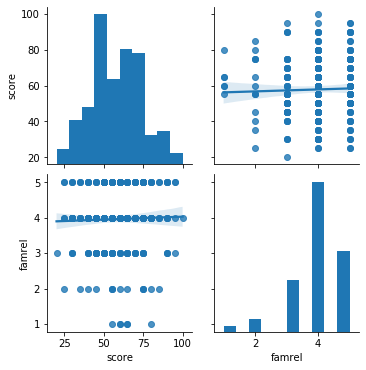

In [81]:
# корреляция оценки и отношение в семье
sns.pairplot(stud_no0score[["score", "famrel"]], kind='reg')
stud_no0score[["score", "famrel"]].corr()

,score,freetime
score,1.000000,-0.012457
freetime,-0.012457,1.000000


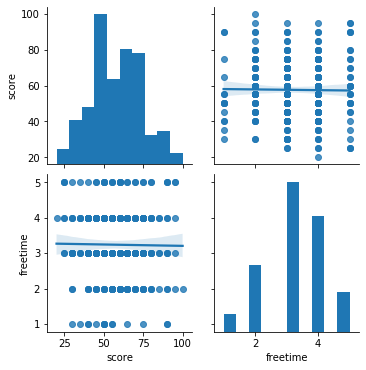

In [82]:
# корреляция оценки и колличество свободного времени
sns.pairplot(stud_no0score[["score", "freetime"]], kind='reg')
stud_no0score[["score", "freetime"]].corr()

,score,goout
score,1.000000,-0.182286
goout,-0.182286,1.000000


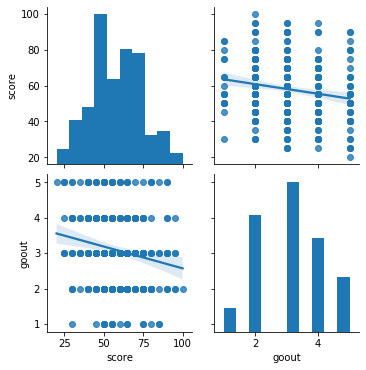

In [83]:
# корреляция оценки и goout
sns.pairplot(stud_no0score[["score", "goout"]], kind='reg')
stud_no0score[["score", "goout"]].corr()

,score,health
score,1.00000,-0.07534
health,-0.07534,1.00000


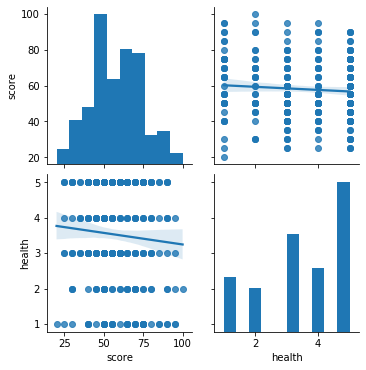

In [84]:
# корреляция оценки и здоровье
sns.pairplot(stud_no0score[["score", "health"]], kind='reg')
stud_no0score[["score", "health"]].corr()

,score,absences
score,1.00000,-0.24222
absences,-0.24222,1.00000


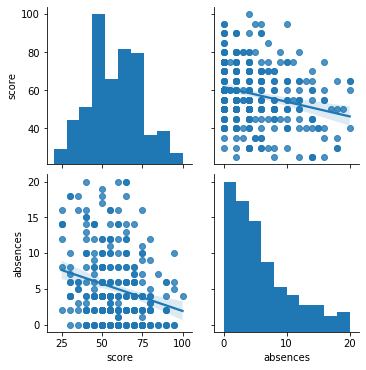

In [85]:
# корреляция оценки и пропусков
sns.pairplot(stud_no0score[["score","absences"]], kind = 'reg')
stud_no0score[["score","absences"]].corr()

### Посмотрим на все коэффициенты корреляции численных параметров

In [86]:
corr_df = stud_no0score[[
    "score", "age", "MFedu_max", "traveltime", "studytime", "failures",
    "famrel", "freetime", "goout", "health", "absences"
]].corr()
# интересны только "большие" коэффициенты корреляции
corr_val = corr_df[np.abs(corr_df.score) > 0.07].score.sort_values().iloc[:-1]
corr_val

failures     -0.289377
absences     -0.242220
goout        -0.182286
age          -0.131542
traveltime   -0.075516
health       -0.075340
studytime     0.142055
MFedu_max     0.221579
Name: score, dtype: float64

### Нашли самые коррелирующие параметры (8 параметров), теперь проверим их взаимную корреляцию

In [87]:
#список наиболее коррелирующих параметров (ограничим коэффициент корреляции)
parameters = list(corr_val.index)
corr_val = 0.1
corr_df = stud_no0score[parameters].corr()
corr_df[(np.abs(corr_df) > corr_val) & (np.abs(corr_df) < 1)]

,failures,absences,goout,age,traveltime,health,studytime,MFedu_max
failures,NaN,0.172971,0.126770,0.235875,NaN,NaN,-0.156406,-0.266726
absences,0.172971,NaN,0.131236,0.209530,NaN,NaN,NaN,NaN
goout,0.126770,0.131236,NaN,0.123638,NaN,NaN,NaN,NaN
age,0.235875,0.209530,0.123638,NaN,NaN,NaN,NaN,-0.129458
traveltime,NaN,NaN,NaN,NaN,NaN,NaN,-0.101490,-0.184140
health,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
studytime,-0.156406,NaN,NaN,NaN,-0.10149,NaN,NaN,NaN
MFedu_max,-0.266726,NaN,NaN,-0.129458,-0.18414,NaN,NaN,NaN


### Вывод

1. некоторые параметры, например здоровье не коррелируют сильно ни с какими другими, поэтому должны остаться.
2. такой неясный параметр, как failures сильно связан с другими, поэтому можно его убрать из рассмотрения, чтобы система не была переопределена.

In [88]:
# итог, важные численные переменные
parameters_num = [
    'absences', 'goout', 'age', 'traveltime', 'health', 'studytime',
    'MFedu_max'
]
parameters_num

['absences', 'goout', 'age', 'traveltime', 'health', 'studytime', 'MFedu_max']

# PCA для численных переменных

'колличество описываемой информации первыми двумя компонентами PCA'

[0.19991034046823497, 0.1682732299165769]

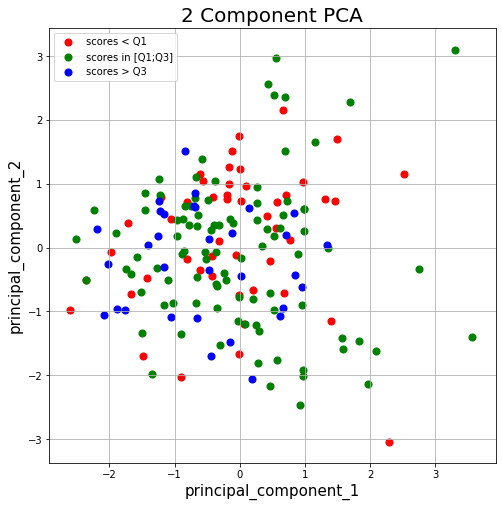

In [89]:
# проведем 2D PCA для оставшихся численных параметров

parameters_num = [
    'absences', 'goout', 'age', 'traveltime', 'health', 'studytime',
    'MFedu_max'
]

parameters_PCA = parameters_num.copy()
parameters_PCA.append("score")
parameters_PCA

df = stud_no0score[parameters_PCA].copy()
#
#display(df.head(20))
drop_list = []
for k in range(0, len(df.index)):
    if np.isnan(df.iloc[k].values).sum() > 0:
        drop_list.append(df.index[k])

drop_list
df.drop(drop_list, inplace=True, axis=0)
#display(df.head(20))

#display("len",len(stud_no0score))
#display("len",len(df))

x = df.loc[:, parameters_num].values
x = StandardScaler().fit_transform(x)

y = df.loc[:, ['score']].values
yQ1 = np.quantile(y, 0.25)
yQ2 = np.quantile(y, 0.5)
yQ3 = np.quantile(y, 0.75)
yIQR = yQ3 - yQ1
#display(yQ1,yQ2,yQ3,yIQR)
df["target"] = stud["score"].apply(lambda x: "<Q1" if (x < yQ1) else
                                   (">Q3" if (x > yQ3) else "[Q1;Q3]"))

#display(pd.DataFrame(data = x, columns = parameters_num).head())

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(
    data=principalComponents,
    columns=['principal_component_1', 'principal_component_2'])
#display(principalDf.head(5))

finalDf = pd.concat([principalDf, df[['target']]], axis=1)
#finalDf.head(5)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('principal_component_1', fontsize=15)
ax.set_ylabel('principal_component_2', fontsize=15)
ax.set_title('2 Component PCA', fontsize=20)

targets = ["<Q1", "[Q1;Q3]", ">Q3"]
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal_component_1'],
               finalDf.loc[indicesToKeep, 'principal_component_2'],
               c=color,
               s=50)
ax.legend(["scores < Q1", "scores in [Q1;Q3]", "scores > Q3"])
ax.grid()
display("колличество описываемой информации первыми двумя компонентами PCA", list(pca.explained_variance_ratio_))

# никаких новых открытий 

# Выводы


## Сохранение финальных данных и важных для построения модели переменных

In [90]:
# важные численные переменные
parameters_num = [
    'absences', 'goout', 'age', 'traveltime', 'health', 'studytime',
    'MFedu_max'
]
#display("численные переменные: ", parameters_num)

# важные номинативные переменные
parameters_nom = ["schoolsup", "Mjob", "address", "Fjob", "sex", "higher"]
#display("номинативные переменные:", parameters_nom)

# все важные переменные
parameters_all = parameters_nom + parameters_num
#display("все важные параметры:", parameters_all)

# финальные данные записаны в stud_model
stud_model = stud_no0score[parameters_all].copy()
display(stud_model.head(5))
display(stud_model.info())

,schoolsup,Mjob,address,Fjob,sex,higher,absences,goout,age,traveltime,health,studytime,MFedu_max
0,yes,at_home,U,teacher,F,yes,6.0,4.0,18,2.0,3.0,2.0,4.0
1,no,at_home,U,other,F,yes,4.0,3.0,17,1.0,3.0,2.0,1.0
2,yes,at_home,U,other,F,yes,10.0,2.0,15,1.0,3.0,2.0,1.0
3,no,health,U,NaN,F,yes,2.0,2.0,15,1.0,5.0,3.0,4.0
4,no,other,U,other,F,yes,4.0,2.0,16,1.0,5.0,2.0,3.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   schoolsup   343 non-null    object 
 1   Mjob        335 non-null    object 
 2   address     338 non-null    object 
 3   Fjob        320 non-null    object 
 4   sex         352 non-null    object 
 5   higher      333 non-null    object 
 6   absences    325 non-null    float64
 7   goout       346 non-null    float64
 8   age         352 non-null    int64  
 9   traveltime  329 non-null    float64
 10  health      339 non-null    float64
 11  studytime   345 non-null    float64
 12  MFedu_max   328 non-null    float64
dtypes: float64(6), int64(1), object(6)
memory usage: 38.5+ KB


None

## Описание всех изменений данных
* Все пустые данные в колонках заменены на np.nan.
* Из базы данных были исключены все студенты, которые получили 0 за экзамен; существенных отличий между этими студентами и теми, кто получил оценку нет. Вероятно, они еще не сдавали экзамен или будут пересдавать.
* Из базы данных были исключены все студенты, у которых нет оценки за экзамен. 
* Колонка "studytime, granular" не имеет точного описания и поэтому была удалена.
* Строки с пустыми значениями в "score" удалены. 
* В колонках "Fedu" и "famrel" было обнаружено по 1 неправильно заполненному значению. Это значения были исправлено на np.nan.
* Много детей, которые регулярно не посещают занятия. Это логично, что если пропустили 100 занятий и более, то это не нормальный случай. Значения вне пределов допустимого интервала [Q1-IQR*1.5, Q3+IQR*1.5] = [-12.0, 20.0] пропусков установлены на np.nan. Таких значений 17.  
* Вместо двух параметров образования родителей, оставлен один равный максимальному образованию в родителей (MFedu_max). Именно этот параметр был оставлен, т.к. имеет наибольший коэффициент корреляции по сравнению с обазованиями каждого из родителей, среднего или минимального. 
* В финальную базу (stud_model) войдут только следующие номинативные parameters_num = ['absences', 'goout', 'age', 'traveltime', 'health', 'studytime', 'MFedu_max'] и численные parameters_nom = ["schoolsup", "Mjob", "address", "Fjob", "sex", "higher"] переменные.
* Колличество переменных (столбцов) в результате анализа уменьшено с 29 до 13. 

## База для построение модели
### Анализ номинативный переменых

* Образовательные учреждения выявляют учеников, которые нуждаются в дополнительной поддержке (schoolsup), но они все равно получают статистически более низкие оценки (p-value = 5e-7).
* Дети в городах получают статистически более высокие оценки, чем дети из сельских местностей (address, p-value = 0.012).
* Работа матери в здравоохранении (Mjob = health) повышают шансы получить более высокую на 10% оценку по сравнению с другими профессиями (at_home или other). Это также самое высокое значение в среднем по отношению к другим профессиям, но это статистически недостоверно.
* Работа отца в образовании (teacher) повышает шансы получить более высокую на 10% оценку по сравнению с работой service или other. Это также самое высокое значение в среднем по отношению к другим профессиям, но это статистически недостоверно.
* Мальчиков получают на 3.3% выше оценки, чем девочки (p-value = 0.055).
* Желание учеников получить высшее образование приводит к более высоким в среднем на 9% оценкам (p-value = 0.0065).
### Анализ численных переменых
* самая высокая корреляция у параметра максимального образования среди родителей (MFedu_max). Этот параметр заменил 2 параметра: образование отца и матери в итоговой "таблице - базе данных", т.к. показывает самый высокий коэффициент корреляции с оценкой по математике среди следующих параметров: образование отца, матери, их среднее образование, их максимальное и минимальное образование.
* Самые большие коэффициенты корреляции у следующих параметров:
    * failures     -0.289377
    * absences     -0.242220
    * goout        -0.182286
    * age          -0.131542
    * traveltime   -0.075516
    * health       -0.075340
    * studytime     0.142055
    * MFedu_max     0.221579
* Внешкольные неудачи коррелируют с absences, goout, age и антикоррелируют с studytime, MFedu_max, с коэффициентами от 0.1 до 0.3 поэтому может быть исключен (и был исключен). 
* PCA анализ не дал дополнительных сведений для построения модели.

